# Twitter Analytics

Notebook that extracts data from twitter analytics, gets insights and can help with strategy.

In [1]:
# data imports
import pandas as pd
import easygui


In [2]:
# Load data and visualize colums
file_string = easygui.fileopenbox(msg="Load Twitter Analytics CSV")
df = pd.read_csv(file_string)
pd.set_option('display.max_columns', None)
df.head()

,Tweet id,Tweet permalink,Tweet text,time,impressions,engagements,engagement rate,retweets,replies,likes,user profile clicks,url clicks,hashtag clicks,detail expands,permalink clicks,app opens,app installs,follows,email tweet,dial phone,media views,media engagements,promoted impressions,promoted engagements,promoted engagement rate,promoted retweets,promoted replies,promoted likes,promoted user profile clicks,promoted url clicks,promoted hashtag clicks,promoted detail expands,promoted permalink clicks,promoted app opens,promoted app installs,promoted follows,promoted email tweet,promoted dial phone,promoted media views,promoted media engagements
0,1517172307386642432,https://twitter.com/glassofbrain/status/151717...,At the end of an axon you can find another pop...,2022-04-21 16:04 +0000,43.0,1.0,0.023256,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
1,1517126756989292545,https://twitter.com/glassofbrain/status/151712...,"Axons are super interesting, they sometimes br...",2022-04-21 13:03 +0000,68.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
2,1517095814388142082,https://twitter.com/glassofbrain/status/151709...,Neuroanatomy 9 - bottom grooves\n#neuroanatomy...,2022-04-21 11:00 +0000,119.0,14.0,0.117647,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0,11,11,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
3,1517051259303436289,https://twitter.com/glassofbrain/status/151705...,The axon is a strange part of the brain cell. ...,2022-04-21 08:03 +0000,71.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
4,1517020308909133825,https://twitter.com/glassofbrain/status/151702...,Important neuro disorder: Schizophrenia. A con...,2022-04-21 06:00 +0000,87.0,1.0,0.011494,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-


# What questions am I trying to answer?
=> Big question: What should I change to increase my twitter success next round?
- What was good?
- What was bad?
- What can be done better?

## Sub Questions:
- What did the previous period look like?
    - Amount of tweets / day, X
    - How many tweets per time block X
    - How many tweets with vs without images? X

- What are the most important parameters to look at?
- How do I grade tweets as being good or bad?
- What are the factors that contribute to a tweet being good or bad?
    - Time of day X
    - Tweet length X
    - Image vs no Image X


## Big questions
- Is it better to post regularly or post pseudo-randomly? (idea of having intermittent rewards)
- What is the best time to post something? 
    - With image X 
    - Without image X


- What is a good strategy for the anatomy images?
- What is a good strategy for the fun fact posts?

    
   

# Previous Period
## Engineering Some extra features


In [3]:
# Add extra data to dataframe
from datetime import datetime

def add_datetime_data_twitter(df):
    """Add date data to df
        - weekdays
        - hours
    """
    dates = df.iloc[:,3]
    weekdays_list = []
    hours_list = []
    day_list = []
    month_list = []
    datetime_list = []

    for date_string in dates:
        
        unpacked_date = datetime.strptime(date_string[:16],"%Y-%m-%d %H:%M")
        
        weekday_int = unpacked_date.weekday()               
        weekdays_list.append(weekday_int)
       
        hours_int = unpacked_date.hour
        hours_list.append(hours_int)
        
        day_int = unpacked_date.day
        day_list.append(day_int)

        month_int = unpacked_date.month
        month_list.append(month_int)
        
        datetime_list.append(unpacked_date)
    df['weekday'] = weekdays_list
    df['hours'] = hours_list
    df['day_num'] = day_list
    df['month_num'] = month_list
    df['datetime_data'] = datetime_list
    
    print("Weekdays, hours, day_num, month_num,datetime added to dataframe")
    return


def add_tweet_data(df):
    """Add tweet metedata to df
        - tweet length
        - number of hashtags
    """
    tweet_len_list = []
    hashtag_num_list = []

    for tweet in df["Tweet text"]:
        tweet_len_list.append(len(tweet))
        hashtag_num_list.append(tweet.count("#"))


    df['tweet_len'] = tweet_len_list
    df['hashtag_num'] = hashtag_num_list
        
    print("tweet len, hashtag num added to dataframe")
    return

#check if it has media (images?)
df["has_media"] =  df["media views"] > 0

#add date stuff
add_datetime_data_twitter(df)

#add tweet relevant info
add_tweet_data(df)

df.head()


Weekdays, hours, day_num, month_num,datetime added to dataframe
tweet len, hashtag num added to dataframe


,Tweet id,Tweet permalink,Tweet text,time,impressions,engagements,engagement rate,retweets,replies,likes,user profile clicks,url clicks,hashtag clicks,detail expands,permalink clicks,app opens,app installs,follows,email tweet,dial phone,media views,media engagements,promoted impressions,promoted engagements,promoted engagement rate,promoted retweets,promoted replies,promoted likes,promoted user profile clicks,promoted url clicks,promoted hashtag clicks,promoted detail expands,promoted permalink clicks,promoted app opens,promoted app installs,promoted follows,promoted email tweet,promoted dial phone,promoted media views,promoted media engagements,has_media,weekday,hours,day_num,month_num,datetime_data,tweet_len,hashtag_num
0,1517172307386642432,https://twitter.com/glassofbrain/status/151717...,At the end of an axon you can find another pop...,2022-04-21 16:04 +0000,43.0,1.0,0.023256,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,False,3,16,21,4,2022-04-21 16:04:00,231,3
1,1517126756989292545,https://twitter.com/glassofbrain/status/151712...,"Axons are super interesting, they sometimes br...",2022-04-21 13:03 +0000,68.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,False,3,13,21,4,2022-04-21 13:03:00,254,3
2,1517095814388142082,https://twitter.com/glassofbrain/status/151709...,Neuroanatomy 9 - bottom grooves\n#neuroanatomy...,2022-04-21 11:00 +0000,119.0,14.0,0.117647,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0,11,11,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,True,3,11,21,4,2022-04-21 11:00:00,79,2
3,1517051259303436289,https://twitter.com/glassofbrain/status/151705...,The axon is a strange part of the brain cell. ...,2022-04-21 08:03 +0000,71.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,False,3,8,21,4,2022-04-21 08:03:00,207,2
4,1517020308909133825,https://twitter.com/glassofbrain/status/151702...,Important neuro disorder: Schizophrenia. A con...,2022-04-21 06:00 +0000,87.0,1.0,0.011494,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,False,3,6,21,4,2022-04-21 06:00:00,213,3


## Amount of tweets per day

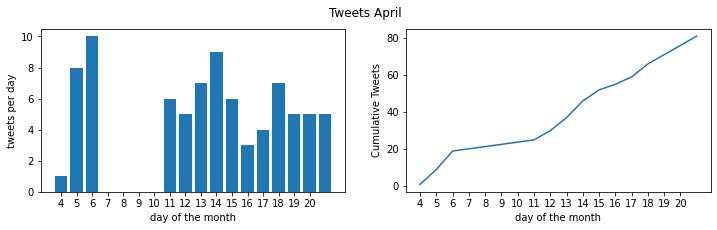

In [24]:
import matplotlib.pyplot as plt
import itertools

def count_uniques(df,column_name):
    x = []
    y = []
    for unique_thing in set(df[column_name]):
        unique_count = list(df[column_name]).count(unique_thing)
        x.append(unique_thing)
        y.append(unique_count)
        
    return x,y

x,y = count_uniques(df,'day_num')
y_cum = list(itertools.accumulate(y))
fig, axs = plt.subplots(1,2)
axs[0].bar(x,y)
axs[0].set_xlabel("day of the month")
axs[0].set_xticks([x for x in range(min(x),max(x))])
axs[0].set_ylabel("tweets per day")

axs[1].plot(x,y_cum)
axs[1].set_xlabel("day of the month")
axs[1].set_xticks([x for x in range(min(x),max(x))])
axs[1].set_ylabel("Cumulative Tweets")


fig.suptitle("Tweets April")
fig.set_figheight(3)
fig.set_figwidth(12)



## Tweets distributed per hour, weekday and media

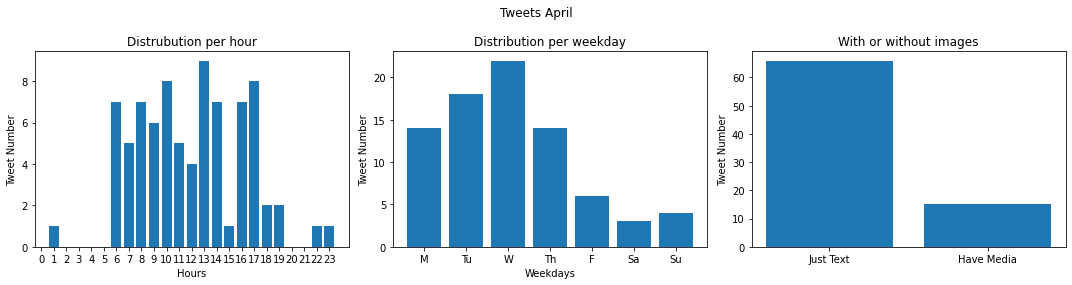

In [5]:
xhour, yhour = count_uniques(df, 'hours')
xwd, ywd = count_uniques(df,'weekday')
xim, yim = count_uniques(df,'has_media')

fig,axs = plt.subplots(1,3)
axs[0].bar(xhour,yhour)
axs[0].set_xticks([x for x in range(0,24)])
axs[0].set_xlabel('Hours')
axs[0].set_ylabel('Tweet Number')
axs[0].set_title('Distrubution per hour')

axs[1].bar(xwd,ywd)
axs[1].set_xticks(xwd)
axs[1].set_xticklabels(['M','Tu','W','Th','F','Sa','Su'])
axs[1].set_xlabel('Weekdays')
axs[1].set_ylabel('Tweet Number')
axs[1].set_title('Distribution per weekday')

axs[2].bar(xim,yim)
axs[2].set_xticks(xim)
axs[2].set_xticklabels(["Just Text","Have Media"])
axs[2].set_ylabel('Tweet Number')
axs[2].set_title('With or without images')

fig.suptitle("Tweets April")
fig.set_figheight(4)
fig.set_figwidth(15)
fig.tight_layout()


## Metrics per day

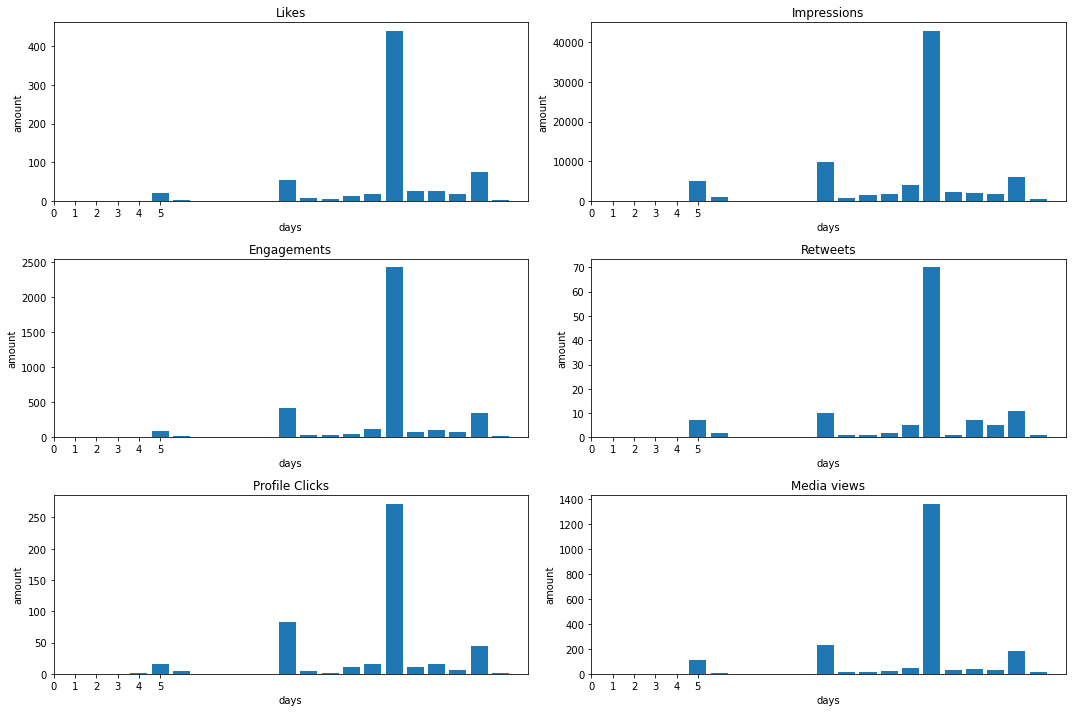

In [156]:
import numpy as np
def get_sum_per_day(df,col_name,group_name):

    col = df[col_name]
    x= []
    y = []
    for unique_day in set(df[group_name]):
        subcol = col[df[group_name] == unique_day]    
        sum_subcol = sum(subcol)
        x.append(unique_day)
        y.append(sum_subcol)
    
    return x,y

def get_mean_per_day(df,col_name,group_name):

    col = df[col_name]
    x= []
    y = []
    for unique_day in set(df[group_name]):
        subcol = col[df[group_name] == unique_day]    
        sum_subcol = np.mean(subcol)
        x.append(unique_day)
        y.append(sum_subcol)
    
    return x,y

xlikes,ylikes = get_sum_per_day(df,'likes','day_num')
ximpressions,yimpressions = get_sum_per_day(df,'impressions','day_num')
xengagement,yengagement = get_sum_per_day(df,'engagements','day_num')
xretweet, yretweet = get_sum_per_day(df,'retweets','day_num')
xprofclick, yprofclick = get_sum_per_day(df,'user profile clicks','day_num')
xmedia,ymedia = get_sum_per_day(df,'media views','day_num')

fig,axs = plt.subplots(3,2)
axs[0,0].bar(xlikes,ylikes)
axs[0,0].set_title('Likes')
axs[0,0].set_xlabel('days')
axs[0,0].set_ylabel('amount')
axs[0,0].set_xticks([x for x in range(min(x),max(x))])

axs[0,1].bar(ximpressions,yimpressions)
axs[0,1].set_title('Impressions')
axs[0,1].set_xlabel('days')
axs[0,1].set_ylabel('amount')
axs[0,1].set_xticks([x for x in range(min(x),max(x))])

axs[1,0].bar(xengagement,yengagement)
axs[1,0].set_title('Engagements')
axs[1,0].set_xlabel('days')
axs[1,0].set_ylabel('amount')
axs[1,0].set_xticks([x for x in range(min(x),max(x))])

axs[1,1].bar(xretweet,yretweet)
axs[1,1].set_title('Retweets')
axs[1,1].set_xlabel('days')
axs[1,1].set_ylabel('amount')
axs[1,1].set_xticks([x for x in range(min(x),max(x))])

axs[2,0].bar(xprofclick,yprofclick)
axs[2,0].set_title('Profile Clicks')
axs[2,0].set_xlabel('days')
axs[2,0].set_ylabel('amount')
axs[2,0].set_xticks([x for x in range(min(x),max(x))])

axs[2,1].bar(xmedia,ymedia)
axs[2,1].set_title('Media views')
axs[2,1].set_xlabel('days')
axs[2,1].set_ylabel('amount')
axs[2,1].set_xticks([x for x in range(min(x),max(x))])

fig.set_figheight(10)
fig.set_figwidth(15)
fig.tight_layout()


### Hypothesis: There is a very predictable link between impressions, likes, engagements, retweets, profile clicks and media views (looking on a day level at least).


In [69]:
def summary_performance_metrics(df):
    xlikes,ylikes = get_sum_per_day(df,'likes','day_num')
    ximpressions,yimpressions = get_sum_per_day(df,'impressions','day_num')
    xengagement,yengagement = get_sum_per_day(df,'engagements','day_num')
    xretweet, yretweet = get_sum_per_day(df,'retweets','day_num')
    xprofclick, yprofclick = get_sum_per_day(df,'user profile clicks','day_num')
    xmedia,ymedia = get_sum_per_day(df,'media views','day_num')

    total_likes = sum(ylikes)
    total_impressions = sum(yimpressions)
    total_engagements = sum(yengagement)
    total_retweets = sum(yretweet)
    total_profile_clicks = sum(yprofclick)
    total_media = sum(ymedia)

    print(f'Total Impressions: \t {total_impressions}')
    print(f'Total likes: \t\t {total_likes} \t\t every {total_impressions/total_likes:0.0f} impressions')
    print(f'Total Engagemenets: \t {total_engagements} \t every {total_impressions/total_engagements:0.0f} impressions')
    print(f'Total Retweets \t\t {total_retweets}\t\t every {total_impressions/total_retweets:0.0f} impressions')
    print(f'Total Profile Clicks \t {total_profile_clicks} \t\t every {total_impressions/total_profile_clicks:0.0f} impressions')
    print(f'Total Media Views \t {total_media} \t \t every {total_impressions/(total_media+0.001):0.0f} impressions')
    return

summary_performance_metrics(df)

Total Impressions: 	 78597.0
Total likes: 		 707.0 		 every 111 impressions
Total Engagemenets: 	 3813.0 	 every 21 impressions
Total Retweets 		 123.0		 every 639 impressions
Total Profile Clicks 	 486.0 		 every 162 impressions
Total Media Views 	 2108 	 	 every 37 impressions


## So intial parameter to investigate would be media vs non media 

Media
Total Impressions: 	 66654.0
Total likes: 		 634.0 		 every 105 impressions
Total Engagemenets: 	 3607.0 	 every 18 impressions
Total Retweets 		 101.0		 every 660 impressions
Total Profile Clicks 	 445.0 		 every 150 impressions
Total Media Views 	 2108 	 	 every 32 impressions
Text
Total Impressions: 	 11943.0
Total likes: 		 73.0 		 every 164 impressions
Total Engagemenets: 	 206.0 	 every 58 impressions
Total Retweets 		 22.0		 every 543 impressions
Total Profile Clicks 	 41.0 		 every 291 impressions
Total Media Views 	 0 	 	 every 11943000 impressions


/tmp/ipykernel_322044/3989915546.py:15: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  axs[0].set_ylim(0,1.1*max(df[column_string]))
/tmp/ipykernel_322044/3989915546.py:20: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  axs[1].set_ylim(0,1.1*max(df[column_string]))


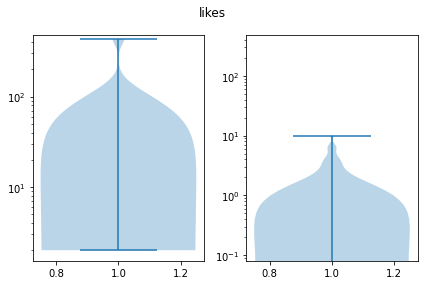

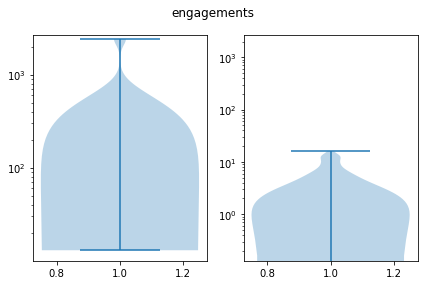

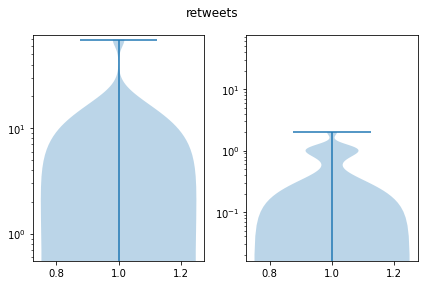

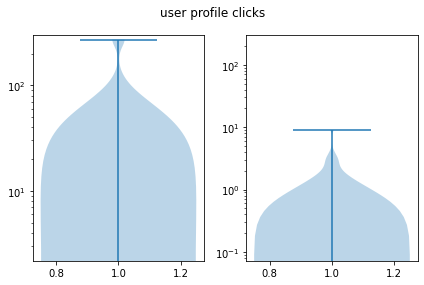

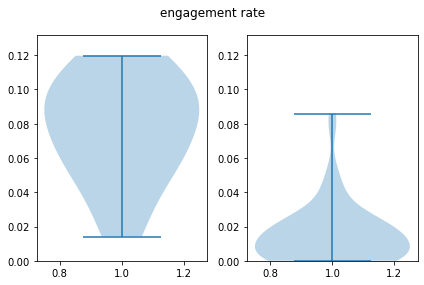

In [98]:
df_media = df[df['has_media']==True]
df_text = df[df['has_media']==False]

print("Media")
summary_performance_metrics(df_media)
print("Text")
summary_performance_metrics(df_text)

def plot_comparison(df_media,df_text,column_string,log=True):

    fig, axs = plt.subplots(1,2)
    axs[0].violinplot(df_media[column_string])
    if log:
        axs[0].set_yscale('log')
    axs[0].set_ylim(0,1.1*max(df[column_string]))

    axs[1].violinplot(df_text[column_string])
    if log:
        axs[1].set_yscale('log')
    axs[1].set_ylim(0,1.1*max(df[column_string]))
    fig.suptitle(column_string)
    fig.tight_layout()
    
plot_comparison(df_media,df_text,'likes')
plot_comparison(df_media,df_text,'engagements')
plot_comparison(df_media,df_text,'retweets')
plot_comparison(df_media,df_text,'user profile clicks')
plot_comparison(df_media,df_text,'engagement rate',log=False)

## Media has a huge impact, BUT it takes a lot of time to make, you get more in return, but what's the ROI?

Time to make fun fact tweets: 2 hours for 22 posts. = 0.0909 hours per post

Time to make images: 6 hours for 7 posts = 0.85714 hours per post


In [129]:
text_effort = 0.1
media_effort = 1

media_effort_list = len(df_media)*[media_effort]
text_effort_list = len(df_text)*[text_effort]

df_media['effort'] = media_effort_list
df_text['effort'] = text_effort_list

/tmp/ipykernel_322044/3092532293.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_media['effort'] = media_effort_list
/tmp/ipykernel_322044/3092532293.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text['effort'] = text_effort_list


In [136]:
ROI_impressions_media = sum(df_media['impressions']) / sum(df_media['effort']) 
ROI_engagements_media = sum(df_media['engagements']) / sum(df_media['effort'])

ROI_impressions_text = sum(df_text['impressions']) / sum(df_text['effort'])
ROI_engagements_text = sum(df_text['engagements']) / sum(df_text['effort'])

print(f'ROI media impressions: {ROI_impressions_media:0.0f} impressions per hour effort')
print(f'ROI media engagements: {ROI_engagements_media:0.0f} engagements per hour effort')
print(f'ROI text impressions: {ROI_impressions_text:0.0f} impressions per hour effort')
print(f'ROI text engagements: {ROI_engagements_text:0.0f} engagements per hour effort')
print()
print(f'Media gives you {ROI_impressions_media/ROI_impressions_text:0.1f}x more impressions per hour effort')
print(f'Media gives you {ROI_engagements_media/ROI_engagements_text:0.1f}x more engagements per hour effort')
print()
print(f'Total effort on all the media so far: {sum(df_media["effort"]):0.1f}')
print(f'Total effort an all the text so far: {sum(df_text["effort"]):0.1f}')

ROI media impressions: 4444 impressions per hour effort
ROI media engagements: 240 engagements per hour effort
ROI text impressions: 1810 impressions per hour effort
ROI text engagements: 31 engagements per hour effort

Media gives you 2.5x more impressions per hour effort
Media gives you 7.7x more engagements per hour effort

Total effort on all the media so far: 15.0
Total effort an all the text so far: 6.6


**Taking into account the time to create the posts, you get a greater ROI to focus on making media intstead of making fun fact posts.**

-> Physiology: blogs

-> Anatomy: twitter

-> fun facts on twitter derived from the blog and linking back to the blog as well "read more here"

## What is the best time of day to post something? 

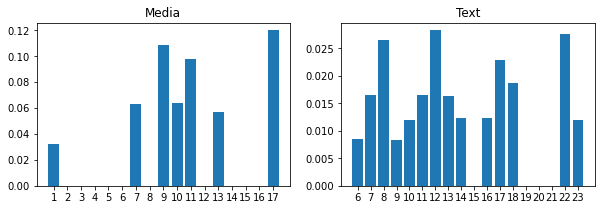

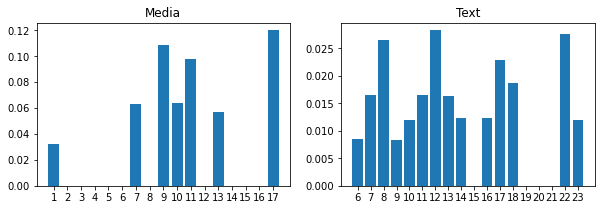

In [176]:
xhr_media,yer_media = get_mean_per_day(df_media,'engagement rate','hours')
xhr_text,yer_text = get_mean_per_day(df_text,'engagement rate','hours')

def plot_media_text_comparison(xhr_media,yer_media,xhr_text,yer_text):

    fig, axs = plt.subplots(1,2)
    axs[0].bar(xhr_media,yer_media)
    axs[0].set_xticks(range(min(xhr_media),max(xhr_media)+1))
    axs[0].set_title("Media")

    axs[1].bar(xhr_text,yer_text)
    axs[1].set_xticks(range(min(xhr_text),max(xhr_text)+1))
    axs[1].set_title("Text")


    fig.set_figheight(3)
    fig.set_figwidth(10)
    return fig

plot_media_text_comparison(xhr_media,yer_media,xhr_text,yer_text)


## Optimal times to post:

-> for media, not sure, 11 and 13 seem better than 12.

-> for text, optimal text post times for engagement:  10, 14, 19

-> for text, optimal for impressions: 12, 16, 19

## Is there a difference in engagement rates / impressions per day? 

Text(0.5, 0.98, 'Engagements')

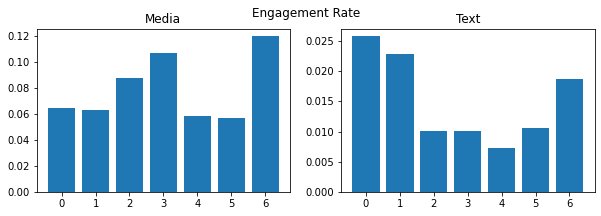

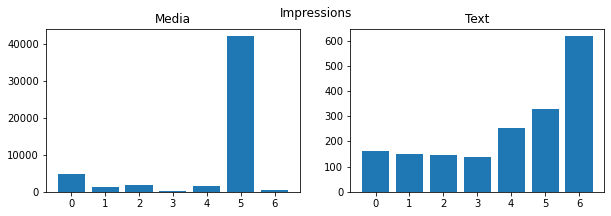

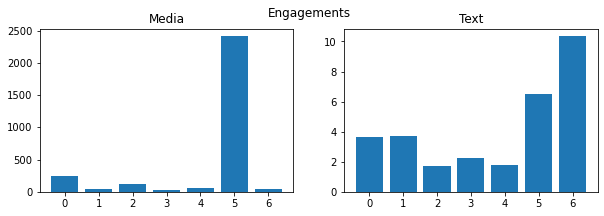

In [210]:
xmedia,ymedia = get_mean_per_day(df_media,'engagement rate','weekday')
xtext,ytext = get_mean_per_day(df_text,'engagement rate','weekday')
fig = plot_media_text_comparison(xmedia,ymedia,xtext,ytext)
fig.suptitle("Engagement Rate")

xmedia,ymedia = get_mean_per_day(df_media,'impressions','weekday')
xtext,ytext = get_mean_per_day(df_text,'impressions','weekday')
fig = plot_media_text_comparison(xmedia,ymedia,xtext,ytext)
fig.suptitle("Impressions")

xmedia,ymedia = get_mean_per_day(df_media,'engagements','weekday')
xtext,ytext = get_mean_per_day(df_text,'engagements','weekday')
fig = plot_media_text_comparison(xmedia,ymedia,xtext,ytext)
fig.suptitle("Engagements")


Text seems to be more catchy at the beginnning of the week engagement wise.

Media seems to be a bit more catchy mid week on wednesday/ thursday.

On the weekends impressions and engagement rate go up for both, maybe put some more effort into it there.


## Is there a link with the amount of hashtags added?

Text(0.5, 0.98, 'Engagements')

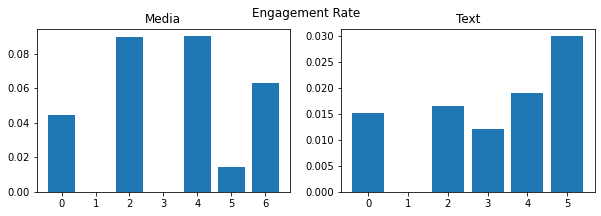

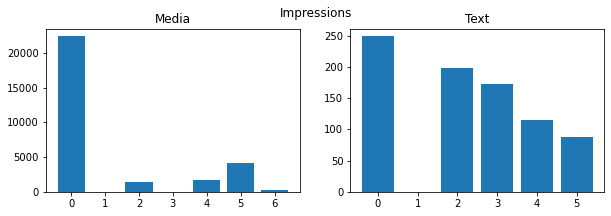

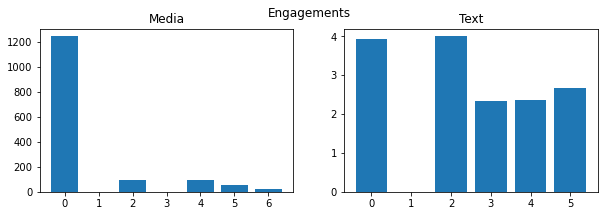

In [173]:
xmedia, ymedia = get_mean_per_day(df_media,'engagement rate','hashtag_num')
xtext, ytext = get_mean_per_day(df_text,'engagement rate','hashtag_num')

fig = plot_media_text_comparison(xmedia,ymedia,xtext,ytext)
fig.suptitle("Engagement Rate")

xmedia, ymedia = get_mean_per_day(df_media,'impressions','hashtag_num')
xtext, ytext = get_mean_per_day(df_text,'impressions','hashtag_num')

fig = plot_media_text_comparison(xmedia,ymedia,xtext,ytext)
fig.suptitle("Impressions")

xmedia, ymedia = get_mean_per_day(df_media,'engagements','hashtag_num')
xtext, ytext = get_mean_per_day(df_text,'engagements','hashtag_num')

fig = plot_media_text_comparison(xmedia,ymedia,xtext,ytext)
fig.suptitle("Engagements")


Less hashtags seem better for driving impressions weirdly enough. But more give you a higher engagement rate. Very strange

-> Have a sample with high hashtags, 5, and a sample with 0 hashtags. see which ones perform better

## Is there a link between tweet length and engagement rate, impressions?

Text(0.5, 0.98, 'Media tweets analyzed')

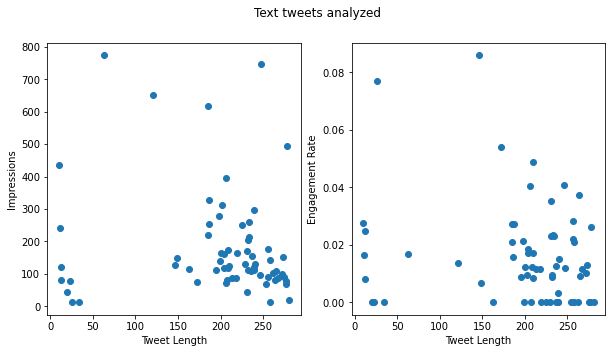

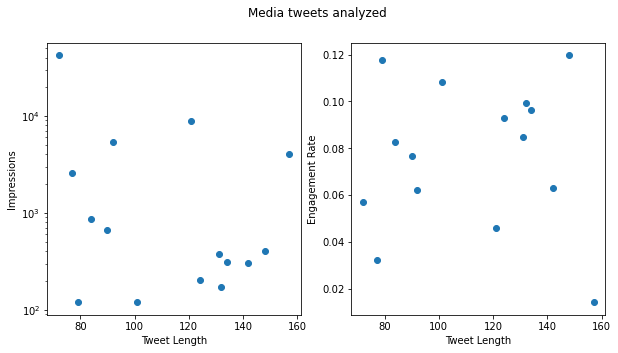

In [208]:
fig, axs = plt.subplots(1,2)
axs[0].scatter(df_text['tweet_len'],df_text['impressions'])
axs[0].set_xlabel('Tweet Length')
axs[0].set_ylabel('Impressions')

axs[1].scatter(df_text['tweet_len'],df_text['engagement rate'])
axs[1].set_xlabel('Tweet Length')
axs[1].set_ylabel('Engagement Rate')


fig.set_figwidth(10)
fig.set_figheight(5)
fig.suptitle('Text tweets analyzed')

fig, axs = plt.subplots(1,2)
axs[0].scatter(df_media['tweet_len'],df_media['impressions'])
axs[0].set_xlabel('Tweet Length')
axs[0].set_ylabel('Impressions')
axs[0].set_yscale('log')

axs[1].scatter(df_media['tweet_len'],df_media['engagement rate'])
axs[1].set_xlabel('Tweet Length')
axs[1].set_ylabel('Engagement Rate')


fig.set_figwidth(10)
fig.set_figheight(5)
fig.suptitle('Media tweets analyzed')





## Sentiment Analysis

In [191]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/robert/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [204]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

compound_score_list = []
for tweet in df_text["Tweet text"]:
    pass
    sentiment = sia.polarity_scores(tweet)
    compound_score = sentiment['compound']
    compound_score_list.append(compound_score)
    
df_text["compound_score"] = compound_score_list


/tmp/ipykernel_322044/1784000436.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text["compound_score"] = compound_score_list


,Tweet id,Tweet permalink,Tweet text,time,impressions,engagements,engagement rate,retweets,replies,likes,user profile clicks,url clicks,hashtag clicks,detail expands,permalink clicks,app opens,app installs,follows,email tweet,dial phone,media views,media engagements,promoted impressions,promoted engagements,promoted engagement rate,promoted retweets,promoted replies,promoted likes,promoted user profile clicks,promoted url clicks,promoted hashtag clicks,promoted detail expands,promoted permalink clicks,promoted app opens,promoted app installs,promoted follows,promoted email tweet,promoted dial phone,promoted media views,promoted media engagements,has_media,weekday,hours,day_num,month_num,datetime_data,tweet_len,hashtag_num,effort,compound_score
0,1517172307386642432,https://twitter.com/glassofbrain/status/151717...,At the end of an axon you can find another pop...,2022-04-21 16:04 +0000,43.0,1.0,0.023256,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,False,3,16,21,4,2022-04-21 16:04:00,231,3,0.1,0.8436
1,1517126756989292545,https://twitter.com/glassofbrain/status/151712...,"Axons are super interesting, they sometimes br...",2022-04-21 13:03 +0000,68.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,False,3,13,21,4,2022-04-21 13:03:00,254,3,0.1,0.7391
3,1517051259303436289,https://twitter.com/glassofbrain/status/151705...,The axon is a strange part of the brain cell. ...,2022-04-21 08:03 +0000,71.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,False,3,8,21,4,2022-04-21 08:03:00,207,2,0.1,-0.2023
4,1517020308909133825,https://twitter.com/glassofbrain/status/151702...,Important neuro disorder: Schizophrenia. A con...,2022-04-21 06:00 +0000,87.0,1.0,0.011494,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,False,3,6,21,4,2022-04-21 06:00:00,213,3,0.1,-0.8225
5,1516824016463429632,https://twitter.com/glassofbrain/status/151682...,"The sticky-outy bits of neurons are called ""de...",2022-04-20 17:00 +0000,108.0,1.0,0.009259,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,False,2,17,20,4,2022-04-20 17:00:00,265,3,0.1,0.2023


Text(0.5, 0.98, 'Text tweets Sentiment Analysis')

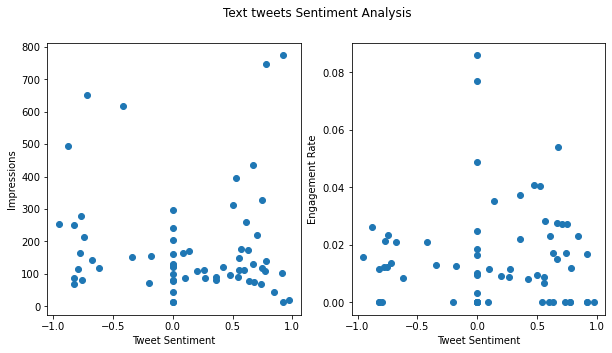

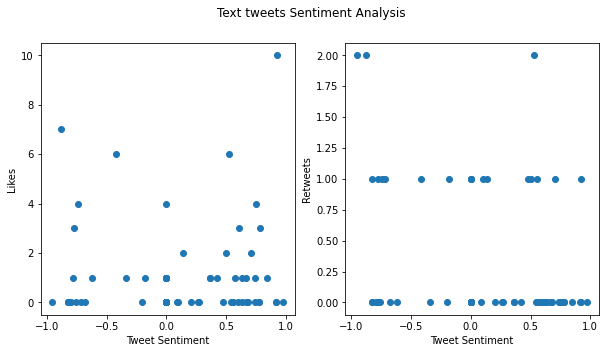

In [207]:
fig, axs = plt.subplots(1,2)
axs[0].scatter(df_text['compound_score'],df_text['impressions'])
axs[0].set_xlabel('Tweet Sentiment')
axs[0].set_ylabel('Impressions')

axs[1].scatter(df_text['compound_score'],df_text['engagement rate'])
axs[1].set_xlabel('Tweet Sentiment')
axs[1].set_ylabel('Engagement Rate')


fig.set_figwidth(10)
fig.set_figheight(5)
fig.suptitle('Text tweets Sentiment Analysis')


fig, axs = plt.subplots(1,2)
axs[0].scatter(df_text['compound_score'],df_text['likes'])
axs[0].set_xlabel('Tweet Sentiment')
axs[0].set_ylabel('Likes')

axs[1].scatter(df_text['compound_score'],df_text['retweets'])
axs[1].set_xlabel('Tweet Sentiment')
axs[1].set_ylabel('Retweets')


fig.set_figwidth(10)
fig.set_figheight(5)
fig.suptitle('Text tweets Sentiment Analysis')

This is interesting, but I don't see any immediate patterns that steer me in one direction or another. The content is fine 

<AxesSubplot:xlabel='hours', ylabel='weekday'>

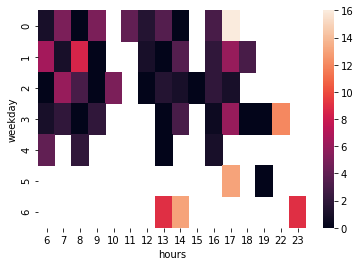

In [240]:
import seaborn as sns
heat_data = df_text.pivot_table('engagements','weekday','hours')
sns.heatmap(heat_data,vmin=0)

# Conclusion

- Impressions might be a good overall proxy for performace on other metrics.
- Focus way more on media, better ROI and drives much more than the text posts.
- Best times to post seem to be: 12 instead of 13 when looking at media. On weekends at 15:00 seems golden for big posts.
- Best days seem to be Wednesday and Saturday to post big things.
- Text seems to perform a bit better earlier in the week, posts before noon (around 10) seem to peform the best. Posts after work is done (19) seem to peform good as well.

# Plan for May.

- Drop all de novo fun facts.
- Develop fun fact strategy that points to blogs.
- Post 2 big things per week, 2x neuroanatomy or 1x neuro and 1x blog. 

# Experiment

- Does removing all the text posts negatively impact my twitter performance?
- Does aggregating Images into bigger wholes give a better ROI than the separate ones now?
- Does adding strategic blog-driving text posts increase linking to blog? Right now there was no turnover.

# Strategy for May

- 1 big post on Wednesday/Thursday at 11:30
- 1 big post on Saturday/Sunday at 15:00
- Aggregate anatomy photos into bigger wholes instead of the small ones.
- 1 Daily fun-fact blog dren post per day. at 10:00 / 19:00
- Experiment with a twitter thread! That's perfect. Also allows for some shorter form Content!

